In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import seaborn as sns
import datetime
import matplotlib.dates as mdates
mpl.rcParams['figure.dpi']= 300

In [106]:
pit_weather_cmp = pd.read_csv('pittsburgh_weather_tmy3_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)
model1_op_cmp = pd.read_csv('model1_operation_train_test_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)

In [70]:
model1_op_cmp

,[1] Zone Thermostat Cooling Setpoint Temperature (C) 2ND%FLOOR%SOUTH:2ND%CONFERENCE%02,[2] Zone Thermostat Cooling Setpoint Temperature (C) 2ND%FLOOR%SOUTH:2ND%CONFERENCE%02,[1] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[1] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW
Date/Time,,,,,,
2002-06-01 00:05:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:10:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:15:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:20:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:25:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:30:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:35:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:40:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:45:00,28,28.000000,0.0,0.0,37.462371,37.462371


In [90]:
pit_weather_cmp.columns = ['TMY3:OAT', 'TMY3: OARH',
                          'TMY3: WD', 'TMY3: WS', 'TMY3: DirSR',
                          'TMY3: DifSR', '2017:OAT', '2017: OARH',
                          '2017: WD', '2017: WS', '2017: DirSR',
                          '2017: DifSR']

In [93]:
pit_weather_cmp = pit_weather_cmp.resample('H').mean()

In [101]:
pit_weather_cmp_reconstruct = [[],[],[]]
column_num = pit_weather_cmp.columns.size
for column_i in range(int(column_num/2)):
    column_name = pit_weather_cmp.columns[column_i]
    pit_weather_cmp_values_tmy3 = pit_weather_cmp[column_name].values
    if 'Solar Radiation' in column_name:
        pit_weather_cmp_values_tmy3 = pit_weather_cmp_values_tmy3[pit_weather_cmp_values_tmy3 > 0]
    pit_weather_cmp_values_max = pit_weather_cmp_values_tmy3.max()
    pit_weather_cmp_values_min = pit_weather_cmp_values_tmy3.min()
    print (pit_weather_cmp_values_min)
    pit_weather_cmp_values_tmy3 = ((pit_weather_cmp_values_tmy3 - pit_weather_cmp_values_min)/
                              (pit_weather_cmp_values_max - pit_weather_cmp_values_min))
    entry_length = pit_weather_cmp_values_tmy3.size
    data_type_source = column_name.split(':')[0]
    data_type_type = column_name.split(':')[1]
    pit_weather_cmp_reconstruct[0].extend(pit_weather_cmp_values_tmy3.tolist())
    pit_weather_cmp_reconstruct[1].extend([data_type_source for _ in range(entry_length)])
    pit_weather_cmp_reconstruct[2].extend([data_type_type for _ in range(entry_length)])
    
    column_name = pit_weather_cmp.columns[column_i + 6]
    pit_weather_cmp_values_2017 = pit_weather_cmp[column_name].values
    if 'Solar Radiation' in column_name:
        pit_weather_cmp_values_2017 = pit_weather_cmp_values_2017[pit_weather_cmp_values_2017 > 0]
    pit_weather_cmp_values_2017 = ((pit_weather_cmp_values_2017 - pit_weather_cmp_values_min)/
                              (pit_weather_cmp_values_max - pit_weather_cmp_values_min))
    entry_length = pit_weather_cmp_values_2017.size
    data_type_source = column_name.split(':')[0]
    data_type_type = column_name.split(':')[1]
    pit_weather_cmp_reconstruct[0].extend(pit_weather_cmp_values_2017.tolist())
    pit_weather_cmp_reconstruct[1].extend([data_type_source for _ in range(entry_length)])
    pit_weather_cmp_reconstruct[2].extend([data_type_type for _ in range(entry_length)])
    
pit_weather_cmp_reconstruct = np.array(pit_weather_cmp_reconstruct).T
pit_weather_cmp_reconstruct = pd.DataFrame(pit_weather_cmp_reconstruct, columns = ['Normalized Value', 'Data Source', 'Weather Parameters'])
pit_weather_cmp_reconstruct[['Normalized Value']] = pit_weather_cmp_reconstruct[['Normalized Value']].apply(pd.to_numeric)

8.0
38.375
0.0
0.0
0.0
0.0


In [102]:
pit_weather_cmp_reconstruct

,Normalized Value,Data Source,Weather Parameters
0,0.409091,TMY3,OAT
1,0.448295,TMY3,OAT
2,0.432576,TMY3,OAT
3,0.416477,TMY3,OAT
4,0.429924,TMY3,OAT
5,0.433712,TMY3,OAT
6,0.429924,TMY3,OAT
7,0.454545,TMY3,OAT
8,0.487879,TMY3,OAT
9,0.556439,TMY3,OAT


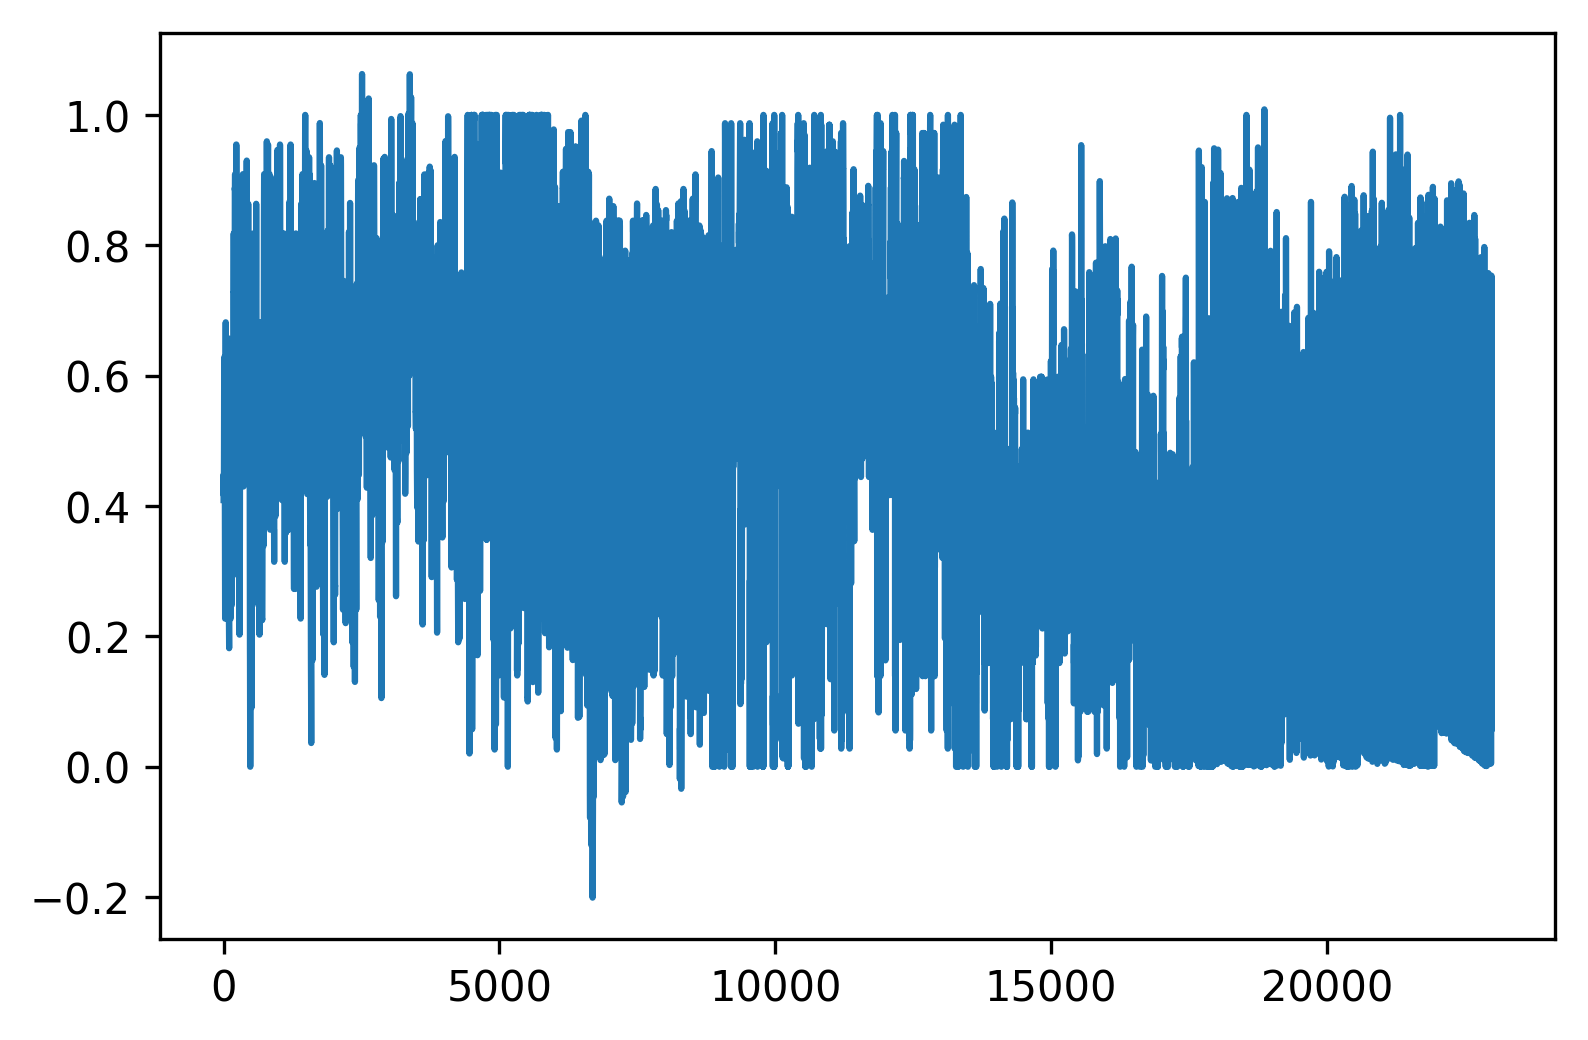

In [77]:
plt.plot(pit_weather_cmp_reconstruct['values'])

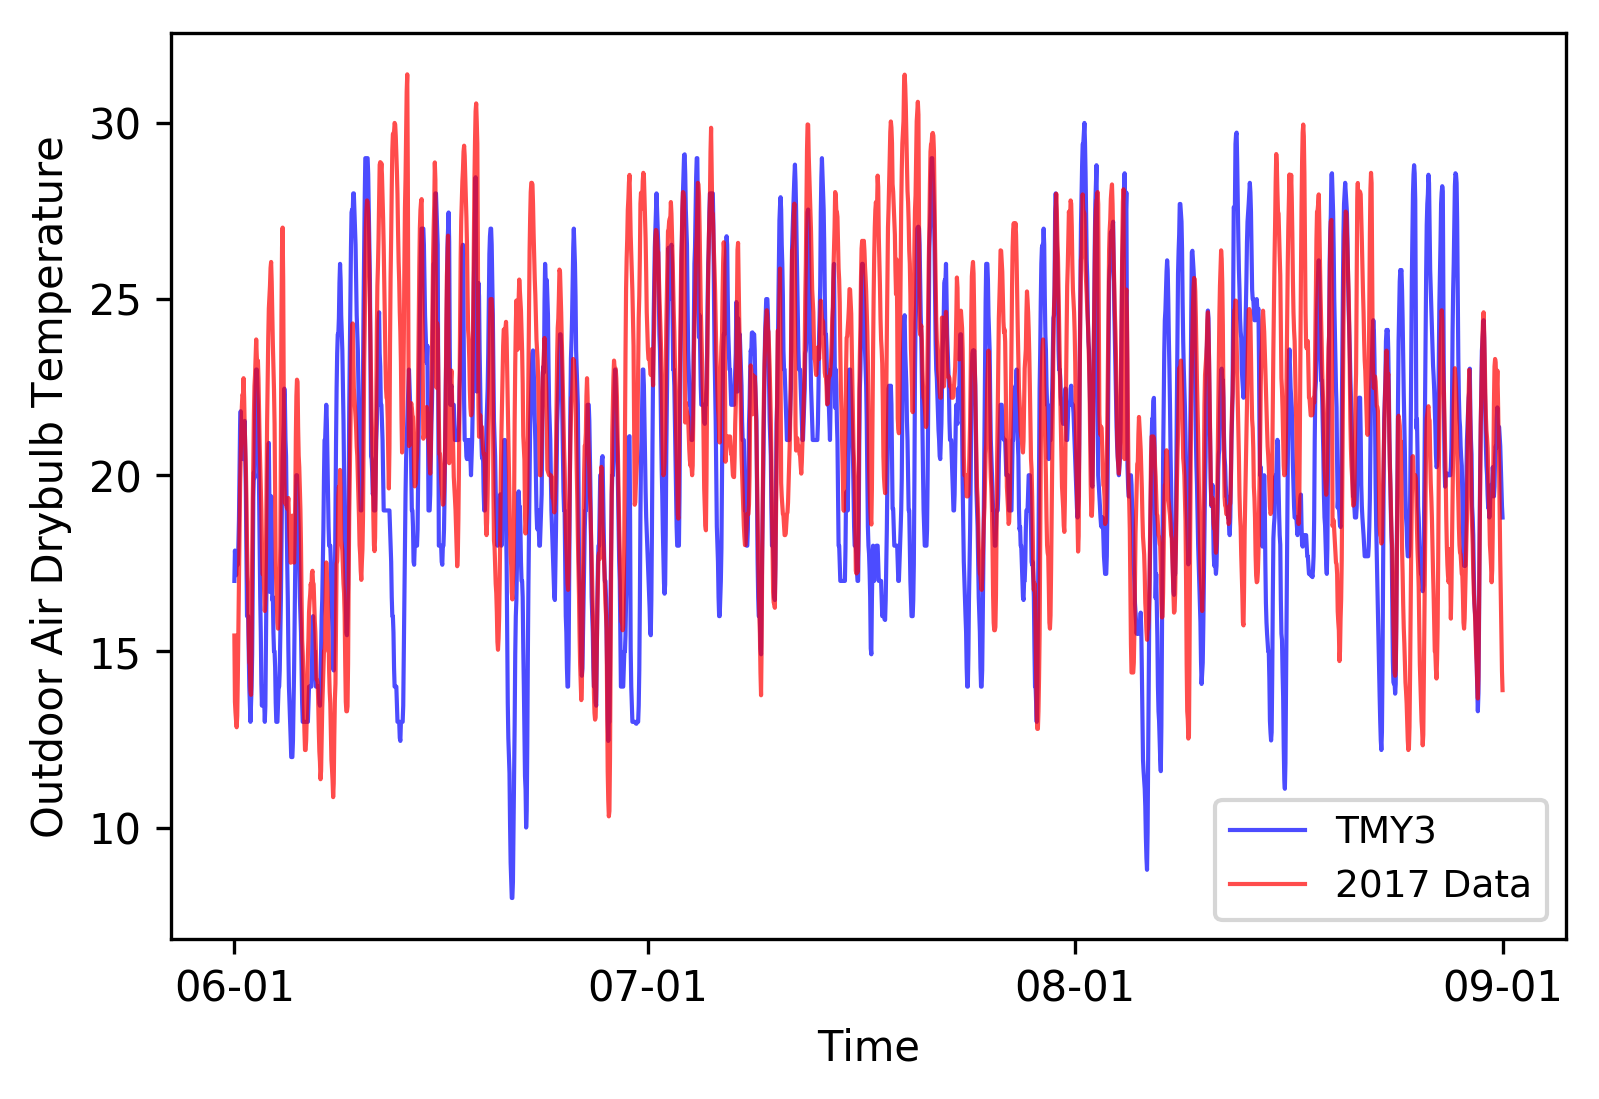

In [78]:
# OAT point-to-point cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(92)])
yearsFmt = mdates.DateFormatter('%m-%d')
months = mdates.MonthLocator()  # every month

plt.plot(pit_weather_cmp['TMY3:Outdoor Air Drybulb Temperature'], color = 'blue',
        label = 'TMY3', linewidth = 1, alpha=0.7)
plt.plot(pit_weather_cmp['2017:Outdoor Air Drybulb Temperature'], color = 'red',
        label = '2017 Data', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Outdoor Air Drybulb Temperature', fontsize = 10)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(months)

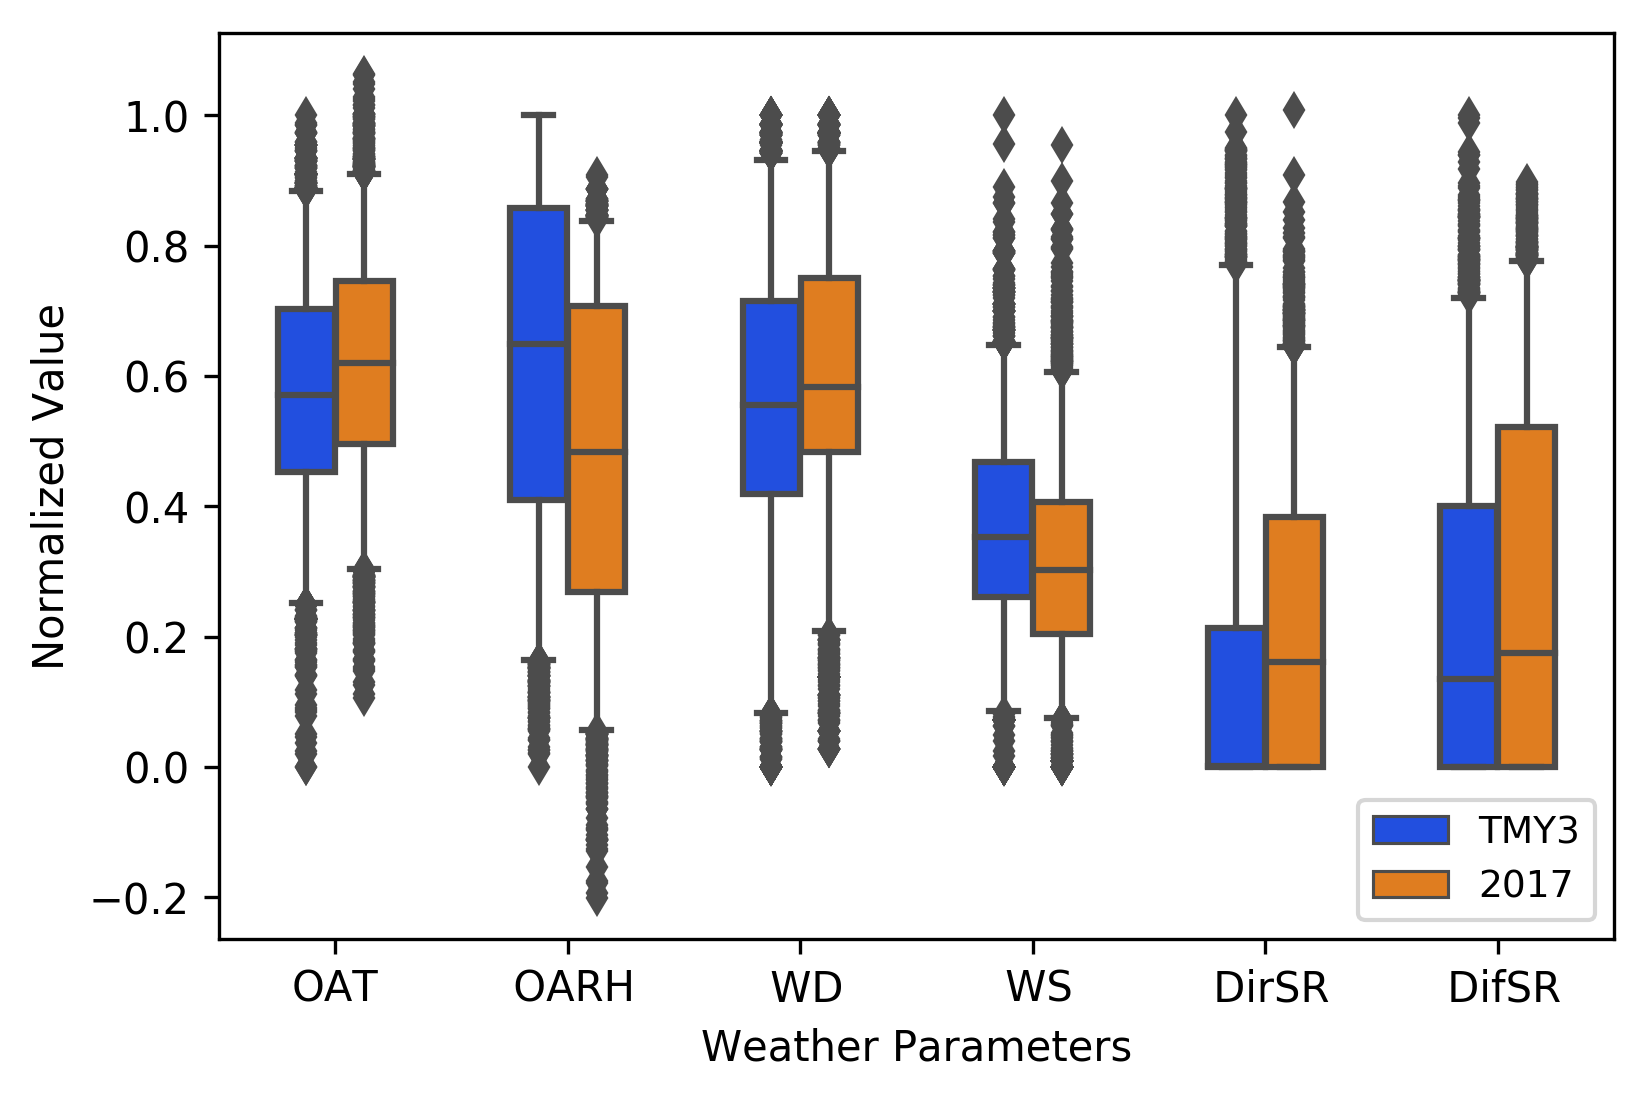

In [103]:
fig = plt.figure(figsize=(6, 4))
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = pit_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95])
plt.legend(fontsize = 9, loc='lower right')

In [107]:
model1_op_cmp

,[1] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[1] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[1] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW
Date/Time,,,,,,
2002-06-01 00:05:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:10:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:15:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:20:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:25:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:30:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:35:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:40:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:45:00,28,28.000000,0.0,0.0,37.462371,37.462371


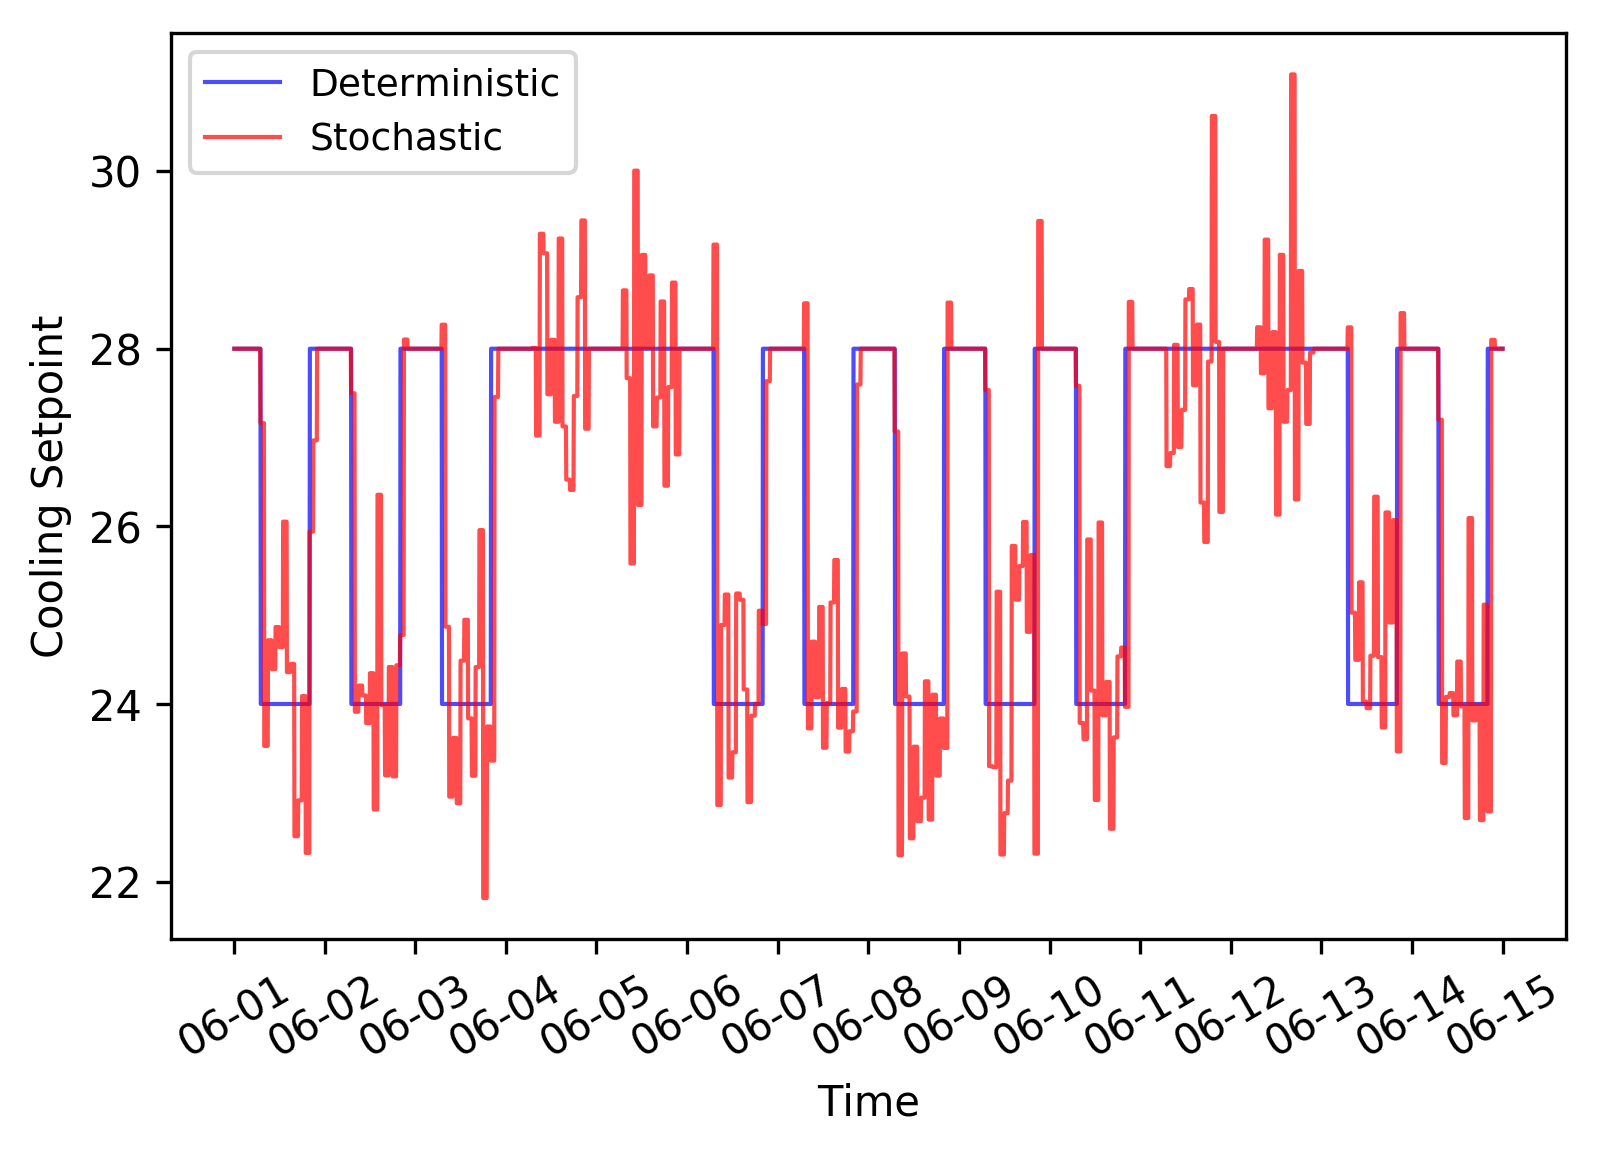

In [117]:
# Model1 cooling setpoint cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month

plt.plot(model1_op_cmp['[1] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032],
         color = 'blue', label = 'Deterministic', linewidth = 1, alpha=0.7)
plt.plot(model1_op_cmp['[2] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032], 
         color = 'red', label = 'Stochastic', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Cooling Setpoint', fontsize = 10)
plt.xticks(rotation=30)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(days)

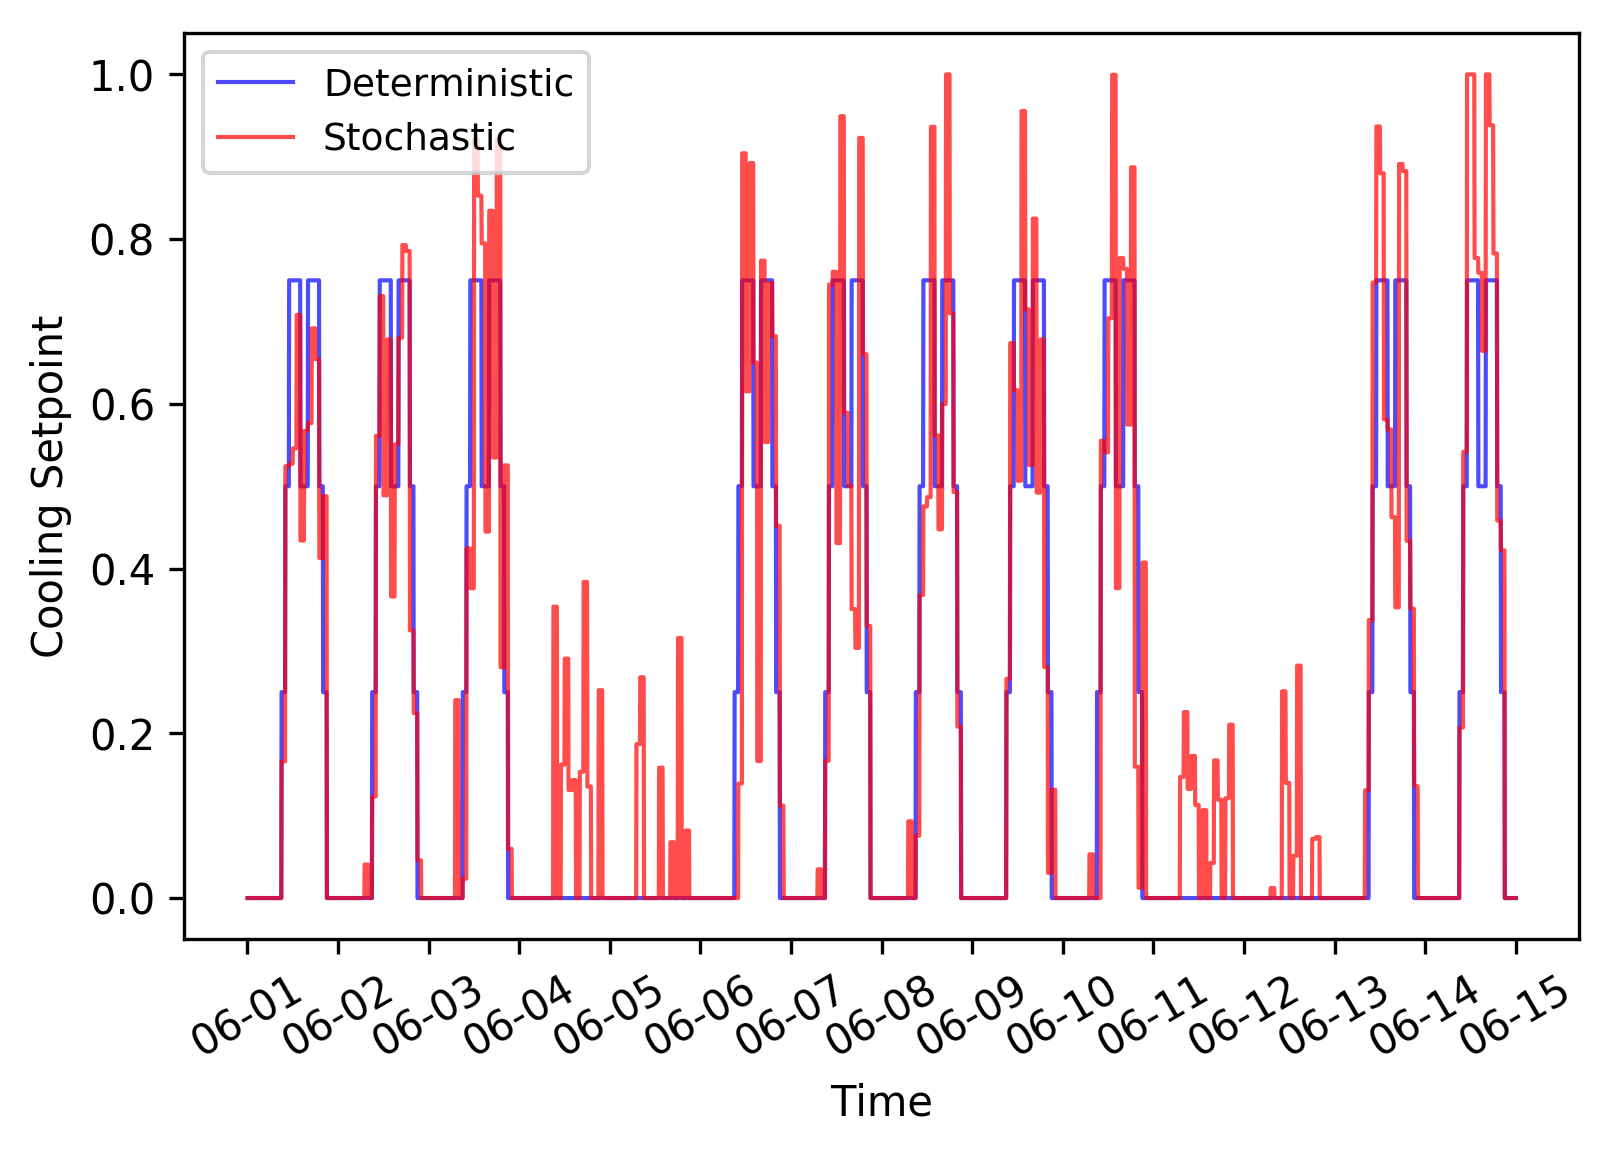

In [119]:
# Model1 occupancy sch cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month

plt.plot(model1_op_cmp['[1] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032]/3,
         color = 'blue', label = 'Deterministic', linewidth = 1, alpha=0.7)
plt.plot(model1_op_cmp['[2] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032]/3, 
         color = 'red', label = 'Stochastic', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Cooling Setpoint', fontsize = 10)
plt.xticks(rotation=30)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(days)